In [86]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Import and clean the data

In [87]:
df= pd.read_csv('1617_AllGames_byTeam_FF.csv')

In [88]:
df

,Unnamed: 0,TEAM,MATCH UP,GAME DATE,MIN,EFG%,FTA RATE,TOV%,TOV,OREB%,...,OPP_TOV,OPP_OREB%,OPP,Home/Away,REST,PTS,OPP_PTS,+/-,WIN,OPP_REST
0,0,POR,POR vs. UTA,10/25/16,48,0.607,0.293,0.140,14.0,0.167,...,14.4,0.171,UTA,1,0,113,104,9,1,0
1,1,UTA,UTA @ POR,10/25/16,48,0.537,0.195,0.144,14.4,0.171,...,14.0,0.167,POR,0,0,104,113,-9,0,0
2,2,NYK,NYK @ CLE,10/25/16,48,0.420,0.230,0.179,17.9,0.245,...,14.1,0.275,CLE,0,0,88,117,-29,0,0
3,3,GSW,GSW vs. SAS,10/25/16,48,0.512,0.212,0.159,15.9,0.190,...,13.7,0.438,SAS,1,0,100,129,-29,0,0
4,4,SAS,SAS @ GSW,10/25/16,48,0.541,0.265,0.137,13.7,0.438,...,15.9,0.190,GSW,0,0,129,100,29,1,0
5,5,CLE,CLE vs. NYK,10/25/16,48,0.548,0.202,0.141,14.1,0.275,...,17.9,0.245,NYK,1,0,117,88,29,1,0
6,6,NOP,NOP vs. DEN,10/26/16,48,0.429,0.283,0.101,10.1,0.096,...,22.4,0.282,DEN,1,0,102,107,-5,0,0
7,7,PHX,PHX vs. SAC,10/26/16,48,0.494,0.351,0.186,18.6,0.244,...,13.8,0.244,SAC,1,0,94,113,-19,0,0
8,8,SAC,SAC @ PHX,10/26/16,48,0.547,0.302,0.138,13.8,0.244,...,18.6,0.244,PHX,0,0,113,94,19,1,0
9,9,HOU,HOU @ LAL,10/26/16,48,0.552,0.314,0.146,14.6,0.263,...,15.4,0.275,LAL,0,0,114,120,-6,0,0


In [89]:
df_all=df

In [90]:
df=df.drop('PTS',axis=1)

In [91]:
df=df.drop('OPP_PTS',axis=1)

In [92]:
df=df.drop('+/-',axis=1)

In [93]:
df=df.drop('WIN',axis=1)

In [94]:
df=df.drop('MATCH UP',axis=1)

In [95]:
df=df.drop('GAME DATE',axis=1)

In [96]:
df=df.drop('TOV',axis=1)

In [97]:
df=df.drop('OPP_TOV',axis=1)

In [98]:
df

,Unnamed: 0,TEAM,MIN,EFG%,FTA RATE,TOV%,OREB%,OPP_EFG%,OPP_FTA RATE,OPP_TOV%,OPP_OREB%,OPP,Home/Away,REST,OPP_REST
0,0,POR,48,0.607,0.293,0.140,0.167,0.537,0.195,0.144,0.171,UTA,1,0,0
1,1,UTA,48,0.537,0.195,0.144,0.171,0.607,0.293,0.140,0.167,POR,0,0,0
2,2,NYK,48,0.420,0.230,0.179,0.245,0.548,0.202,0.141,0.275,CLE,0,0,0
3,3,GSW,48,0.512,0.212,0.159,0.190,0.541,0.265,0.137,0.438,SAS,1,0,0
4,4,SAS,48,0.541,0.265,0.137,0.438,0.512,0.212,0.159,0.190,GSW,0,0,0
5,5,CLE,48,0.548,0.202,0.141,0.275,0.420,0.230,0.179,0.245,NYK,1,0,0
6,6,NOP,48,0.429,0.283,0.101,0.096,0.494,0.398,0.224,0.282,DEN,1,0,0
7,7,PHX,48,0.494,0.351,0.186,0.244,0.547,0.302,0.138,0.244,SAC,1,0,0
8,8,SAC,48,0.547,0.302,0.138,0.244,0.494,0.351,0.186,0.244,PHX,0,0,0
9,9,HOU,48,0.552,0.314,0.146,0.263,0.573,0.247,0.154,0.275,LAL,0,0,0


In [99]:
df1=df

In [100]:
df1=df1.drop('TEAM',axis=1)

In [101]:
df1=df1.drop('OPP',axis=1)

In [102]:
X=df1.values[:,1:]

In [103]:
X

array([[ 48.   ,   0.607,   0.293, ...,   1.   ,   0.   ,   0.   ],
       [ 48.   ,   0.537,   0.195, ...,   0.   ,   0.   ,   0.   ],
       [ 48.   ,   0.42 ,   0.23 , ...,   0.   ,   0.   ,   0.   ],
       ..., 
       [ 48.   ,   0.493,   0.264, ...,   0.   ,   1.   ,   2.   ],
       [ 48.   ,   0.462,   0.151, ...,   0.   ,   1.   ,   2.   ],
       [ 48.   ,   0.548,   0.386, ...,   1.   ,   3.   ,   2.   ]])

In [104]:
y1=df_all.values[:,-2]

In [105]:
y1=y1.astype('int')

In [106]:
y1

array([1, 0, 0, ..., 0, 0, 1])

# Important features selection

In [107]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets

model = ExtraTreesClassifier()
model.fit(X, y1)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.015725    0.23303633  0.05977191  0.07756679  0.06626529  0.2490645
  0.06781659  0.07156708  0.06380761  0.02413838  0.03306744  0.03817308]


# Task 1: Testing Machine Learning Accuracy

# Step 1: Fit in Random Forest Classifier

# Split training and testing sets

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2)

# Select best Hyperparameters

In [110]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()


params = {'n_estimators':[10,20,30,40],'max_depth': [2, 4, 8, 16], 'min_samples_leaf':[2, 4, 8],'max_features': [0.2,0.3,0.4, 0.8,1.0]}

RFgrid = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')
RFgrid.fit(X_train,y_train)
print('The best score is', RFgrid.best_score_)
print('The best parameters are', RFgrid.best_params_)

The best score is 0.868902439024
The best parameters are {'max_depth': 16, 'max_features': 0.2, 'min_samples_leaf': 2, 'n_estimators': 40}


# Confusion Matrix Accuracy


In [111]:
rf = RandomForestClassifier(n_estimators = 16, min_samples_leaf = 2,max_features = 0.2, max_depth = 40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[210  31]
 [ 26 225]]


# ROC Accuracy

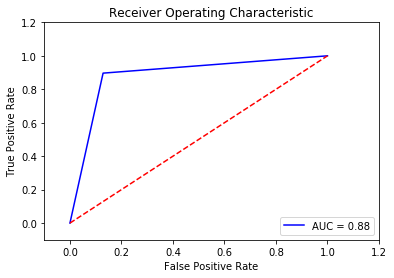

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Metrics accuracy

In [113]:
scores = []
for rs in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=rs)
    rf = RandomForestClassifier(n_estimators = 16, min_samples_leaf = 2,max_features = 0.2, max_depth = 40)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores = np.array(scores)    
i = np.argmax(scores)
print('best [k, score] = [%g, %g], mean score = '%(i+1, scores[i]), scores.mean())


best [k, score] = [11, 0.888211], mean score =  0.863928112965


# Cross-validation Accuracy

In [114]:
from sklearn.model_selection import cross_val_score
import numpy as np
# 10-fold cross-validation
rf = RandomForestClassifier(n_estimators = 16, min_samples_leaf = 2,max_features = 0.2, max_depth = 40)
scores = cross_val_score(rf, X, y1, cv=10, scoring='accuracy')
print('scores are:',scores)
print('mean of scores is:',scores.mean())



scores are: [ 0.88211382  0.87398374  0.8902439   0.82113821  0.85365854  0.84146341
  0.85365854  0.86585366  0.88211382  0.8902439 ]
mean of scores is: 0.865447154472


# Step 2: Fit in Logistic Model

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2)

# Select best Hyperparameters

In [116]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()

params = {'C': [0.01, 0.1, 0.8, 0.9, 1,10],
          'penalty': ['l1','l2'], 
          'class_weight':['balanced', None]}
          
          
LRgrid = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')
LRgrid.fit(X_train, y_train)
print('The best score is', LRgrid.best_score_)
print('The best parameters are', LRgrid.best_params_)

The best score is 0.944613821138
The best parameters are {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}


# Confusion Matrix Accuracy

In [117]:
lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[245  19]
 [ 12 216]]


# ROC Accuracy

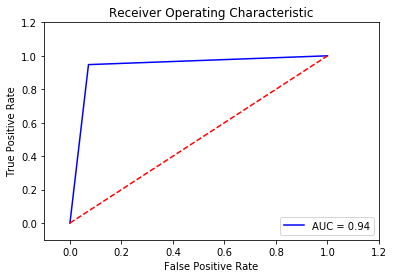

In [118]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Metrics Accuracy

In [119]:
scores = []
for rs in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=rs)
    lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores = np.array(scores)    
i = np.argmax(scores)
print('best [k, score] = [%g, %g], mean score = '%(i+1, scores[i]), scores.mean())

best [k, score] = [5, 0.961382], mean score =  0.945228925973


# Cross-validation Accuracy

In [120]:
from sklearn.model_selection import cross_val_score
import numpy as np
# 10-fold cross-validation
lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
scores = cross_val_score(lr, X, y1, cv=10, scoring='accuracy')
print('scores are:',scores)
print('mean of scores is:',scores.mean())



scores are: [ 0.94308943  0.95121951  0.97560976  0.92682927  0.96747967  0.89430894
  0.93495935  0.96747967  0.94715447  0.96341463]
mean of scores is: 0.947154471545


# Task 1: Testing prediction accuracy with additional data (predictive data)

# Part I: Without one hot encoding

# Step 1: Split the data mannually

In [121]:
df_test= pd.read_csv('AllGames_Test.csv')

In [122]:
df_test_all=df_test

In [123]:
df_test=df_test.drop('W/L',axis=1)
df_test=df_test.drop('GAME DATE',axis=1)
df_test=df_test.drop('TEAM',axis=1)
df_test=df_test.drop('OPP',axis=1)

In [124]:
X_test=df_test.values[:,1:]

In [125]:
X_test

array([[ 48.    ,   0.4946,   0.2048, ...,   1.    ,   0.    ,   0.    ],
       [ 48.    ,   0.5662,   0.2562, ...,   0.    ,   0.    ,   0.    ],
       [ 48.    ,   0.4968,   0.2236, ...,   0.    ,   0.    ,   0.    ],
       ..., 
       [ 48.    ,   0.53  ,   0.2764, ...,   0.    ,   1.    ,   2.    ],
       [ 48.    ,   0.5152,   0.2532, ...,   0.    ,   1.    ,   2.    ],
       [ 48.    ,   0.473 ,   0.2052, ...,   1.    ,   3.    ,   2.    ]])

In [126]:
y1_test=df_test_all.values[:,-1]
y1_test=y1_test.astype('int')

In [127]:
y1_test

array([1, 0, 0, ..., 0, 0, 1])

In [128]:
X_train=X[:2000,]

In [129]:
X_train

array([[ 48.   ,   0.607,   0.293, ...,   1.   ,   0.   ,   0.   ],
       [ 48.   ,   0.537,   0.195, ...,   0.   ,   0.   ,   0.   ],
       [ 48.   ,   0.42 ,   0.23 , ...,   0.   ,   0.   ,   0.   ],
       ..., 
       [ 48.   ,   0.513,   0.375, ...,   1.   ,   3.   ,   2.   ],
       [ 48.   ,   0.483,   0.303, ...,   0.   ,   2.   ,   3.   ],
       [ 48.   ,   0.443,   0.398, ...,   1.   ,   3.   ,   2.   ]])

In [130]:
print(X_train.shape)

(2000, 12)


In [131]:
y1_train=y1[:2000,]

In [132]:
y1_train

array([1, 0, 0, ..., 1, 0, 1])

In [133]:
print(y1_train.shape)

(2000,)


In [134]:
X_test=X_test[2000:,]

In [135]:
print(X_test.shape)

(460, 12)


In [136]:
y1_test=y1_test[2000:,]

In [137]:
print(y1_test.shape)

(460,)


# Step 2: Fit in  Logistic Model

# Select best hyperparameters

In [144]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()

params = {'C': [0.01, 0.1, 0.8, 0.9, 1,10,20],
          'penalty': ['l1','l2'], 
          'class_weight':['balanced', None]}
          
          
LRgrid =GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')
LRgrid.fit(X_train, y1_train)
print('The best score is', LRgrid.best_score_)
print('The best parameters are', LRgrid.best_params_)

The best score is 0.945
The best parameters are {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}


# Confusion Matrix Accuracy

In [143]:
lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
lr.fit(X_train, y1_train)
y_pred = lr.predict(X_test)
cm=metrics.confusion_matrix(y1_test,y_pred)
print(cm)

[[124 106]
 [106 124]]


# ROC Curve Accuracy

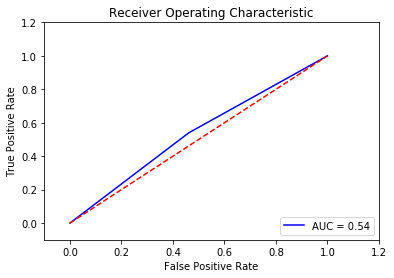

In [145]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y1_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Step 3: Fit in Random Forest Classifier

# Select best hyperparameters

In [149]:
from sklearn.ensemble import RandomForestClassifier 


clf = RandomForestClassifier()


params = {'n_estimators':[10,20,30,40],'max_depth': [2, 4, 8, 16], 'min_samples_leaf':[2, 4, 8],'max_features': [0.2,0.3,0.4, 0.8,1.0]}

RFgrid = RandomizedSearchCV(param_distributions = params,
                            estimator=clf, 
                            cv=5, scoring = 'accuracy', n_iter=1)
RFgrid.fit(X_train,y1_train)
print('The best score is', RFgrid.best_score_)
print('The best parameters are', RFgrid.best_params_)

The best score is 0.8655
The best parameters are {'n_estimators': 30, 'min_samples_leaf': 4, 'max_features': 0.4, 'max_depth': 16}


# Confusion Matrix Accuracy

In [152]:
rf = RandomForestClassifier(n_estimators = 30, min_samples_leaf = 4,max_features = 0.4, max_depth = 16)
rf.fit(X_train, y1_train)
y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y1_test,y_pred)
print(cm)

[[121 109]
 [ 99 131]]


# ROC Curve Accuracy

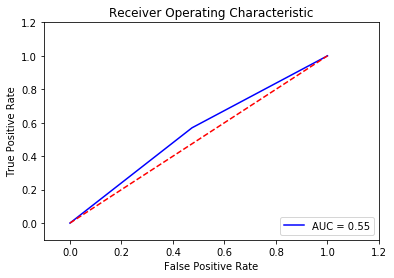

In [153]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y1_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Part I: With one hot encoding

# Step 1: Convert the categorical variables and split the training and testing sets

In [59]:
df_onehot1=df_all['TEAM']
df_onehot1=df_onehot1.to_frame()
df_onehot2=df_all['OPP']
df_onehot2=df_onehot2.to_frame()
df_onehot=df_onehot1.join(df_onehot2)
#df_onehot = pd.DataFrame(df_all, columns = ['TEAM', 'OPP'])

In [60]:
X_dummies = pd.get_dummies(df_onehot, columns=df_onehot.columns, drop_first=True)

In [61]:
X_dummies

,TEAM_BKN,TEAM_BOS,TEAM_CHA,TEAM_CHI,TEAM_CLE,TEAM_DAL,TEAM_DEN,TEAM_DET,TEAM_GSW,TEAM_HOU,...,OPP_OKC,OPP_ORL,OPP_PHI,OPP_PHX,OPP_POR,OPP_SAC,OPP_SAS,OPP_TOR,OPP_UTA,OPP_WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_onehot=X_dummies.join(df1)

In [63]:
print(df_onehot.shape)

(2460, 71)


In [64]:
df_onehot=df_onehot.drop('Unnamed: 0',axis=1)

In [65]:
print(df_onehot.shape)

(2460, 70)


In [66]:
df_onehot.to_csv('onehot_training.csv')

In [67]:
X=df_onehot.values
X_train=X[:2000,]

In [68]:
df_test=df_test_all.drop('Unnamed: 0',axis=1)


In [69]:
df_onehot1_test=df_test['TEAM']
df_onehot1_test=df_onehot1_test.to_frame()
df_onehot2_test=df_test['OPP']
df_onehot2_test=df_onehot2_test.to_frame()
df_onehot_test=df_onehot1_test.join(df_onehot2_test)

In [70]:
X_dummies = pd.get_dummies(df_onehot_test, columns=df_onehot_test.columns, drop_first=True)

In [71]:
df_onehot_test=X_dummies.join(df_test)

In [72]:
df_onehot_test=df_onehot_test.drop('TEAM',axis=1)
df_onehot_test=df_onehot_test.drop('OPP',axis=1)
df_onehot_test=df_onehot_test.drop('GAME DATE',axis=1)
df_onehot_test=df_onehot_test.drop('W/L',axis=1)

In [73]:
print(df_onehot_test.shape)

(2460, 70)


In [74]:
df_onehot_test.to_csv('onehot_testing.csv')

In [75]:
X_test=df_onehot_test.values[2000:,]

In [76]:
print(X_test.shape)

(460, 70)


In [77]:
y1_test=df_test['W/L'].values
y1_test=y1_test[2000:]

# Step 2: Fit in  Logistic Model

# Select best hyperparameters

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

clf = LogisticRegression()

params = {'C': [0.01, 0.1, 0.8, 0.9, 1,10],
          'penalty': ['l1','l2'], 
          'class_weight':['balanced', None]}
          
          
LRgrid = RandomizedSearchCV(param_distributions = params,
                            estimator=clf, 
                            cv=5, scoring = 'accuracy', n_iter=1)
LRgrid.fit(X_train, y1_train)
print('The best score is', LRgrid.best_score_)
print('The best parameters are', LRgrid.best_params_)

The best score is 0.9155
The best parameters are {'penalty': 'l2', 'class_weight': 'balanced', 'C': 10}


# Confusion Matrix Accuracy

In [79]:
lr=LogisticRegression(penalty = 'l1', class_weight = None, C = 1)
lr.fit(X_train, y1_train)
y_pred = lr.predict(X_test)
cm=metrics.confusion_matrix(y1_test,y_pred)
print(cm)

[[134  96]
 [ 95 135]]


# ROC Curve Accuracy

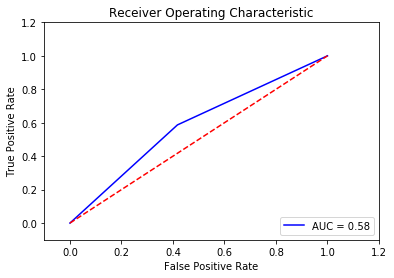

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y1_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Step 3: Fit in Random Forest Classifier

# Select best hyperparameters

In [159]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()


params = {'n_estimators':[10,20,30,40],'max_depth': [2, 4, 8, 16], 'min_samples_leaf':[2, 4, 8],'max_features': [0.2,0.3,0.4, 0.8,1.0]}

RFgrid = RandomizedSearchCV(param_distributions = params,estimator=clf, cv=5, scoring = 'accuracy')
RFgrid.fit(X_train,y1_train)
print('The best score is', RFgrid.best_score_)
print('The best parameters are', RFgrid.best_params_)

The best score is 0.8645
The best parameters are {'n_estimators': 40, 'min_samples_leaf': 8, 'max_features': 1.0, 'max_depth': 8}


# Confusion Matrix Accuracy

In [160]:
rf = RandomForestClassifier(n_estimators = 40, min_samples_leaf = 8,max_features = 1.0, max_depth = 8)
rf.fit(X_train, y1_train)
y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y1_test,y_pred)
print(cm)

[[127 103]
 [101 129]]


# ROC Curve Accuracy

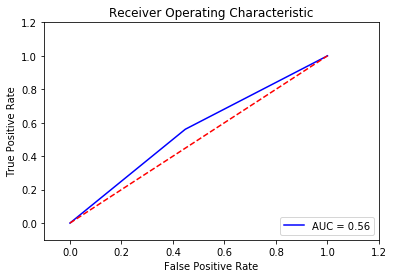

In [161]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y1_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')

In [ ]:
#RandomizedSearchCV(param_distributions = params,estimator=clf, cv=5, scoring = 'accuracy')